In [43]:
pip install pmdarima

     |████████████████████████████████| 604 kB 1.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [224]:
def mape(actual,pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [225]:
df = pd.read_csv("crime_reports_cleaned.csv")

In [226]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,LOCATION,LATITUDE,LONGITUDE,OFFENSE_DESCRIPTION,OFFENSE_CODE_GROUP,ADDRESS,ROAD,NEIGHBOURHOOD,SUBURB,CITY,COUNTY
0,192070453,100,0,2019-09-03 23:25:00,2019,9,Tuesday,23,"(42.38135785377728, -71.03768162799254)",42.381358,-71.037682,MIGRATED REPORT - CRIMINAL HOMICIDE,HOMICIDE,"{'house_number': '49', 'road': 'West Eagle Str...",West Eagle Street,Eagle Hill,East Boston,Boston,Suffolk County
1,212002782,520,0,2021-01-13 10:10:00,2021,1,Wednesday,10,"(42.38135785377728, -71.03768162799254)",42.381358,-71.037682,BURGLARY - RESIDENTIAL - FORCE,RESIDENTIAL BURGLARY,"{'house_number': '49', 'road': 'West Eagle Str...",West Eagle Street,Eagle Hill,East Boston,Boston,Suffolk County
2,212025886,614,0,2021-04-22 09:48:00,2021,4,Thursday,9,"(42.38135785377728, -71.03768162799254)",42.381358,-71.037682,LARCENY THEFT FROM MV - NON-ACCESSORY,LARCENY FROM MOTOR VEHICLE,"{'house_number': '49', 'road': 'West Eagle Str...",West Eagle Street,Eagle Hill,East Boston,Boston,Suffolk County
3,212002485,801,0,2021-01-12 10:00:00,2021,1,Tuesday,10,"(42.38135785377728, -71.03768162799254)",42.381358,-71.037682,ASSAULT - SIMPLE,SIMPLE ASSAULT,"{'house_number': '49', 'road': 'West Eagle Str...",West Eagle Street,Eagle Hill,East Boston,Boston,Suffolk County
4,212016939,801,0,2021-03-17 02:41:00,2021,3,Wednesday,2,"(42.38135785377728, -71.03768162799254)",42.381358,-71.037682,ASSAULT - SIMPLE,SIMPLE ASSAULT,"{'house_number': '49', 'road': 'West Eagle Str...",West Eagle Street,Eagle Hill,East Boston,Boston,Suffolk County


In [227]:
df["Date"] = pd.to_datetime(pd.to_datetime(df["OCCURRED_ON_DATE"]).dt.date)

In [228]:
df

,INCIDENT_NUMBER,OFFENSE_CODE,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,LOCATION,LATITUDE,LONGITUDE,OFFENSE_DESCRIPTION,OFFENSE_CODE_GROUP,ADDRESS,ROAD,NEIGHBOURHOOD,SUBURB,CITY,COUNTY,Date
0,192070453,100,0,2019-09-03 23:25:00,2019,9,Tuesday,23,"(42.38135785377728, -71.03768162799254)",42.381358,-71.037682,MIGRATED REPORT - CRIMINAL HOMICIDE,HOMICIDE,"{'house_number': '49', 'road': 'West Eagle Str...",West Eagle Street,Eagle Hill,East Boston,Boston,Suffolk County,2019-09-03
1,212002782,520,0,2021-01-13 10:10:00,2021,1,Wednesday,10,"(42.38135785377728, -71.03768162799254)",42.381358,-71.037682,BURGLARY - RESIDENTIAL - FORCE,RESIDENTIAL BURGLARY,"{'house_number': '49', 'road': 'West Eagle Str...",West Eagle Street,Eagle Hill,East Boston,Boston,Suffolk County,2021-01-13
2,212025886,614,0,2021-04-22 09:48:00,2021,4,Thursday,9,"(42.38135785377728, -71.03768162799254)",42.381358,-71.037682,LARCENY THEFT FROM MV - NON-ACCESSORY,LARCENY FROM MOTOR VEHICLE,"{'house_number': '49', 'road': 'West Eagle Str...",West Eagle Street,Eagle Hill,East Boston,Boston,Suffolk County,2021-04-22
3,212002485,801,0,2021-01-12 10:00:00,2021,1,Tuesday,10,"(42.38135785377728, -71.03768162799254)",42.381358,-71.037682,ASSAULT - SIMPLE,SIMPLE ASSAULT,"{'house_number': '49', 'road': 'West Eagle Str...",West Eagle Street,Eagle Hill,East Boston,Boston,Suffolk County,2021-01-12
4,212016939,801,0,2021-03-17 02:41:00,2021,3,Wednesday,2,"(42.38135785377728, -71.03768162799254)",42.381358,-71.037682,ASSAULT - SIMPLE,SIMPLE ASSAULT,"{'house_number': '49', 'road': 'West Eagle Str...",West Eagle Street,Eagle Hill,East Boston,Boston,Suffolk County,2021-03-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595571,202040056,3831,0,2020-06-09 00:27:00,2020,6,Tuesday,0,"(42.2920205635861, -71.0668167896352)",42.292021,-71.066817,M/V - LEAVING SCENE - PROPERTY DAMAGE,MOTOR VEHICLE ACCIDENT RESPONSE,"{'house_number': '2,4', 'road': 'Allston Stree...",Allston Street,Dorchester Center,Dorchester,Boston,Suffolk County,2020-06-09
595572,212086751,3831,0,2021-11-27 08:40:00,2021,11,Saturday,8,"(42.343217007978886, -71.15347298016538)",42.343217,-71.153473,M/V - LEAVING SCENE - PROPERTY DAMAGE,MOTOR VEHICLE ACCIDENT RESPONSE,{'highway': 'Chestnut Hill Ave opp Wiltshire R...,Chestnut Hill Avenue,Aberdeen,Brighton,Boston,Suffolk County,2021-11-27
595573,212024920,3831,0,2021-04-18 03:57:00,2021,4,Sunday,3,"(42.303915017720094, -71.06844800607495)",42.303915,-71.068448,M/V - LEAVING SCENE - PROPERTY DAMAGE,MOTOR VEHICLE ACCIDENT RESPONSE,"{'house_number': '27', 'road': 'Topliff Street...",Topliff Street,Mount Ida,Dorchester,Boston,Suffolk County,2021-04-18
595574,I182046434,3831,0,2018-06-11 05:57:00,2018,6,Monday,5,"(42.36314537, -71.05414244)",42.363145,-71.054142,M/V - LEAVING SCENE - PROPERTY DAMAGE,MOTOR VEHICLE ACCIDENT RESPONSE,"{'house_number': '130-140', 'road': 'Richmond ...",Richmond Street,Dock Square,North End,Boston,Suffolk County,2018-06-11


In [229]:
df_monthly = df.groupby(pd.Grouper(key = "Date", freq = "M")).count()

<AxesSubplot:xlabel='Date'>

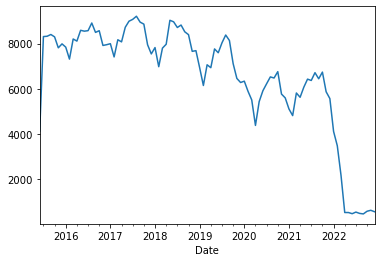

In [230]:
df_monthly.INCIDENT_NUMBER.plot()

In [231]:
df_monthly = df_monthly.loc[:"2022-02-28"]

In [232]:
df_monthly.head()

,INCIDENT_NUMBER,OFFENSE_CODE,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,LOCATION,LATITUDE,LONGITUDE,OFFENSE_DESCRIPTION,OFFENSE_CODE_GROUP,ADDRESS,ROAD,NEIGHBOURHOOD,SUBURB,CITY,COUNTY
Date,,,,,,,,,,,,,,,,,,,
2015-06-30,4131,4131,4131,4131,4131,4131,4131,4131,4131,4131,4131,4131,4131,4131,4122,2637,3654,4131,4131
2015-07-31,8312,8312,8312,8312,8312,8312,8312,8312,8312,8312,8312,8312,8312,8312,8296,5232,7399,8310,8312
2015-08-31,8326,8326,8326,8326,8326,8326,8326,8326,8326,8326,8326,8326,8326,8326,8309,5203,7445,8323,8326
2015-09-30,8404,8404,8404,8404,8404,8404,8404,8404,8404,8404,8404,8404,8404,8404,8394,5300,7553,8402,8404
2015-10-31,8299,8299,8299,8299,8299,8299,8299,8299,8299,8299,8299,8299,8299,8299,8287,5247,7389,8298,8299


In [233]:
df_monthly.tail()

,INCIDENT_NUMBER,OFFENSE_CODE,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,LOCATION,LATITUDE,LONGITUDE,OFFENSE_DESCRIPTION,OFFENSE_CODE_GROUP,ADDRESS,ROAD,NEIGHBOURHOOD,SUBURB,CITY,COUNTY
Date,,,,,,,,,,,,,,,,,,,
2021-10-31,6741,6741,6741,6741,6741,6741,6741,6741,6741,6741,6741,6741,6741,6741,6731,4245,6182,6739,6741
2021-11-30,5871,5871,5871,5871,5871,5871,5871,5871,5871,5871,5871,5871,5871,5871,5858,3718,5396,5869,5871
2021-12-31,5570,5570,5570,5570,5570,5570,5570,5570,5570,5570,5570,5570,5570,5570,5561,3550,5009,5567,5570
2022-01-31,4117,4117,4117,4117,4117,4117,4117,4117,4117,4117,4117,4117,4117,4117,4115,2592,3757,4117,4117
2022-02-28,3483,3483,3483,3483,3483,3483,3483,3483,3483,3483,3483,3483,3483,3483,3480,2143,3159,3483,3483


<AxesSubplot:xlabel='Date'>

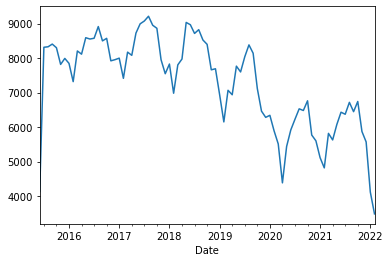

In [234]:
df_monthly.INCIDENT_NUMBER.plot()

In [235]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

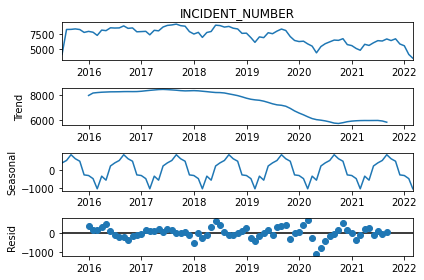

In [236]:
seasonal_decompose(df_monthly.INCIDENT_NUMBER, model = "additive", period = 12).plot();

In [237]:
from pmdarima import auto_arima

In [238]:
auto_arima(df_monthly.INCIDENT_NUMBER, seasonal=True, m = 12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   81
Model:             SARIMAX(1, 1, 0)x(1, 0, [1], 12)   Log Likelihood                -628.366
Date:                              Sat, 23 Apr 2022   AIC                           1264.732
Time:                                      13:34:47   BIC                           1274.260
Sample:                                           0   HQIC                          1268.552
                                               - 81                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2385      0.091      2.623      0.009       0.060       0.417
ar.S.L12       0.8898      0.109      8.148      0.000       0.676       1.104
ma.S.L12      -0.6204      0.203     -3.056      0.002      -1.018      -0.223
sigma2      3.744e+05    5.1e+04      7.341      0.000    2.74e+05    4.74e+05
===================================================================================
Ljung-Box (L1) (Q):                   3.92   Jarque-Bera (JB):               358.94
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):               0.34   Skew:                             1.75
Prob(H) (two-sided):                  0.01   Kurtosis:                        12.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [239]:
len(df_monthly)

81

In [240]:
train = df_monthly[:"2020-08-30"]
test = df_monthly["2020-08-30":]

In [241]:
test

,INCIDENT_NUMBER,OFFENSE_CODE,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,LOCATION,LATITUDE,LONGITUDE,OFFENSE_DESCRIPTION,OFFENSE_CODE_GROUP,ADDRESS,ROAD,NEIGHBOURHOOD,SUBURB,CITY,COUNTY
Date,,,,,,,,,,,,,,,,,,,
2020-08-31,6528,6528,6528,6528,6528,6528,6528,6528,6528,6528,6528,6528,6528,6528,6518,4020,5899,6527,6528
2020-09-30,6480,6480,6480,6480,6480,6480,6480,6480,6480,6480,6480,6480,6480,6480,6471,4000,5873,6478,6480
2020-10-31,6761,6761,6761,6761,6761,6761,6761,6761,6761,6761,6761,6761,6761,6761,6756,4237,6127,6760,6761
2020-11-30,5769,5769,5769,5769,5769,5769,5769,5769,5769,5769,5769,5769,5769,5769,5760,3490,5240,5769,5769
2020-12-31,5601,5601,5601,5601,5601,5601,5601,5601,5601,5601,5601,5601,5601,5601,5590,3425,5050,5601,5601
2021-01-31,5113,5113,5113,5113,5113,5113,5113,5113,5113,5113,5113,5113,5113,5113,5105,3121,4607,5113,5113
2021-02-28,4817,4817,4817,4817,4817,4817,4817,4817,4817,4817,4817,4817,4817,4817,4810,2892,4405,4816,4817
2021-03-31,5817,5817,5817,5817,5817,5817,5817,5817,5817,5817,5817,5817,5817,5817,5810,3480,5261,5817,5817
2021-04-30,5627,5627,5627,5627,5627,5627,5627,5627,5627,5627,5627,5627,5627,5627,5614,3395,5129,5626,5627


In [242]:
model = SARIMAX(train.INCIDENT_NUMBER, order =(1, 1, 0), seasonal_order=(1, 0, [1], 12)).fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.02509D+00    |proj g|=  2.82161D-01

At iterate    5    f=  7.87138D+00    |proj g|=  1.24488D-03

At iterate   10    f=  7.86935D+00    |proj g|=  4.00122D-02

At iterate   15    f=  7.84199D+00    |proj g|=  3.13665D-02

At iterate   20    f=  7.81364D+00    |proj g|=  6.86868D-03

At iterate   25    f=  7.81080D+00    |proj g|=  1.00704D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     40      1     0     0   

 This problem is unconstrained.


In [243]:
start = "2020-08-31"
end = "2022-02-28"

In [244]:
predictions = model.predict(start, end, typ = "levels").rename("Predictions")

/Users/nitheeshkoushik/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [245]:
predictions

2020-08-31    6274.280931
2020-09-30    6095.907488
2020-10-31    5916.058641
2020-11-30    5443.080399
2020-12-31    5395.171398
2021-01-31    5324.706463
2021-02-28    4888.746451
2021-03-31    5304.898276
2021-04-30    5148.177391
2021-05-31    5769.848991
2021-06-30    6073.327298
2021-07-31    6649.116695
2021-08-31    6768.656656
2021-09-30    6609.944963
2021-10-31    6435.453536
2021-11-30    5963.971506
2021-12-31    5916.461685
2022-01-31    5846.110658
2022-02-28    5410.220710
Freq: M, Name: Predictions, dtype: float64

In [246]:
test.INCIDENT_NUMBER

Date
2020-08-31    6528
2020-09-30    6480
2020-10-31    6761
2020-11-30    5769
2020-12-31    5601
2021-01-31    5113
2021-02-28    4817
2021-03-31    5817
2021-04-30    5627
2021-05-31    6074
2021-06-30    6430
2021-07-31    6371
2021-08-31    6716
2021-09-30    6446
2021-10-31    6741
2021-11-30    5871
2021-12-31    5570
2022-01-31    4117
2022-02-28    3483
Freq: M, Name: INCIDENT_NUMBER, dtype: int64

<AxesSubplot:xlabel='Date'>

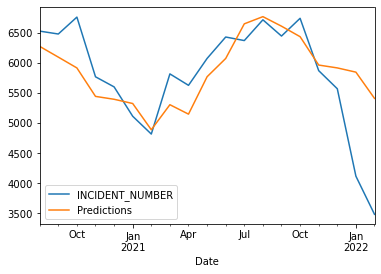

In [247]:
test.INCIDENT_NUMBER.plot(legend = True)
predictions.plot(legend = True)

In [248]:
mape(test.INCIDENT_NUMBER, predictions)

9.604925448673185

In [249]:
from statsmodels.tools.eval_measures import rmse


In [250]:
rmse(predictions, test.INCIDENT_NUMBER)

683.2070644943142

In [251]:
df_monthly.INCIDENT_NUMBER.mean()

7266.16049382716

In [252]:
model = SARIMAX(df_monthly.INCIDENT_NUMBER, order =(1, 1, 0), seasonal_order=(1, 0, [1], 12)).fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.94892D+00    |proj g|=  2.86174D-01

At iterate    5    f=  7.77802D+00    |proj g|=  4.32888D-03

At iterate   10    f=  7.77660D+00    |proj g|=  5.33134D-04

At iterate   15    f=  7.77654D+00    |proj g|=  1.96629D-03

At iterate   20    f=  7.76843D+00    |proj g|=  6.05170D-03

At iterate   25    f=  7.76593D+00    |proj g|=  2.14580D-04

At iterate   30    f=  7.76548D+00    |proj g|=  9.45445D-03

At iterate   35    f=  7.76021D+00    |proj g|=  2.39044D-02

At iterate   40    f=  7.75763D+00    |proj g|=  1.08136D-03

At iterate   45    f=  7.75761D+00    |proj g|=  1.89062D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

In [253]:
predictions = model.predict(len(df_monthly), len(df_monthly) + 11, typ = "levels").rename("Predictions")

<AxesSubplot:xlabel='Date'>

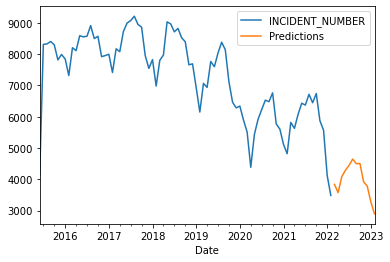

In [254]:
df_monthly.INCIDENT_NUMBER.plot(legend = True)
predictions.plot(legend = True)

In [255]:
df_rox = df[df.SUBURB == "Roxbury"]

In [256]:
df_rox

,INCIDENT_NUMBER,OFFENSE_CODE,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,LOCATION,LATITUDE,LONGITUDE,OFFENSE_DESCRIPTION,OFFENSE_CODE_GROUP,ADDRESS,ROAD,NEIGHBOURHOOD,SUBURB,CITY,COUNTY,Date
4450,192074613,100,1,2019-09-16 23:46:00,2019,9,Monday,23,"(42.3329339989186, -71.0924049433507)",42.332934,-71.092405,MIGRATED REPORT - CRIMINAL HOMICIDE,HOMICIDE,"{'road': 'Tremont Street', 'neighbourhood': 'R...",Tremont Street,Roxbury Crossing,Roxbury,Boston,Suffolk County,2019-09-16
4451,212073779,111,0,2021-10-11 19:35:00,2021,10,Monday,19,"(42.3329339989186, -71.0924049433507)",42.332934,-71.092405,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",HOMICIDE,"{'road': 'Tremont Street', 'neighbourhood': 'R...",Tremont Street,Roxbury Crossing,Roxbury,Boston,Suffolk County,2021-10-11
4452,I182101462,301,0,2018-12-16 17:30:00,2018,12,Sunday,17,"(42.3329339989186, -71.0924049433507)",42.332934,-71.092405,ROBBERY - STREET,ROBBERY,"{'road': 'Tremont Street', 'neighbourhood': 'R...",Tremont Street,Roxbury Crossing,Roxbury,Boston,Suffolk County,2018-12-16
4453,192076520,400,0,2019-09-22 21:50:00,2019,9,Sunday,21,"(42.3329339989186, -71.0924049433507)",42.332934,-71.092405,MIGRATED REPORT - AGGRAVATED ASSAULT/AGGRAVATE...,ROBBERY,"{'road': 'Tremont Street', 'neighbourhood': 'R...",Tremont Street,Roxbury Crossing,Roxbury,Boston,Suffolk County,2019-09-22
4454,192066401,413,0,2019-08-22 16:00:00,2019,8,Thursday,16,"(42.3329339989186, -71.0924049433507)",42.332934,-71.092405,ASSAULT - AGGRAVATED - BATTERY,AGGRAVATED ASSAULT,"{'road': 'Tremont Street', 'neighbourhood': 'R...",Tremont Street,Roxbury Crossing,Roxbury,Boston,Suffolk County,2019-08-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595514,212038385,3831,0,2021-06-08 16:30:00,2021,6,Tuesday,16,"(42.32388997313778, -71.08029002175262)",42.323890,-71.080290,M/V - LEAVING SCENE - PROPERTY DAMAGE,MOTOR VEHICLE ACCIDENT RESPONSE,"{'house_number': '25', 'road': 'Montrose Stree...",Montrose Street,Nubian Square,Roxbury,Boston,Suffolk County,2021-06-08
595515,I162071587,3831,0,2016-09-02 07:00:00,2016,9,Friday,7,"(42.322034, -71.09527086)",42.322034,-71.095271,M/V - LEAVING SCENE - PROPERTY DAMAGE,MOTOR VEHICLE ACCIDENT RESPONSE,"{'house_number': '42', 'road': 'Marcella Stree...",Marcella Street,NaN,Roxbury,Boston,Suffolk County,2016-09-02
595519,202054161,3831,0,2020-07-30 21:47:00,2020,7,Thursday,21,"(42.3304410942632, -71.0968169798589)",42.330441,-71.096817,M/V - LEAVING SCENE - PROPERTY DAMAGE,MOTOR VEHICLE ACCIDENT RESPONSE,"{'road': 'Terrace Street', 'neighbourhood': 'R...",Terrace Street,Roxbury Crossing,Roxbury,Boston,Suffolk County,2020-07-30
595527,202054217,3831,0,2020-07-31 09:01:00,2020,7,Friday,9,"(42.3296439928887, -71.0974719868578)",42.329644,-71.097472,M/V - LEAVING SCENE - PROPERTY DAMAGE,MOTOR VEHICLE ACCIDENT RESPONSE,"{'house_number': '4', 'road': 'Terrace Place',...",Terrace Place,Roxbury Crossing,Roxbury,Boston,Suffolk County,2020-07-31


In [257]:
df_rox_monthly = df_rox.groupby(pd.Grouper(key = "Date", freq = "M")).count()

In [258]:
df_rox_monthly

,INCIDENT_NUMBER,OFFENSE_CODE,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,LOCATION,LATITUDE,LONGITUDE,OFFENSE_DESCRIPTION,OFFENSE_CODE_GROUP,ADDRESS,ROAD,NEIGHBOURHOOD,SUBURB,CITY,COUNTY
Date,,,,,,,,,,,,,,,,,,,
2015-06-30,401,401,401,401,401,401,401,401,401,401,401,401,401,401,401,250,401,401,401
2015-07-31,813,813,813,813,813,813,813,813,813,813,813,813,813,813,813,484,813,813,813
2015-08-31,852,852,852,852,852,852,852,852,852,852,852,852,852,852,852,494,852,852,852
2015-09-30,790,790,790,790,790,790,790,790,790,790,790,790,790,790,790,474,790,790,790
2015-10-31,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787,447,787,787,787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,33,47,47,47
2022-09-30,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,27,43,43,43
2022-10-31,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,28,40,40,40


<AxesSubplot:xlabel='Date'>

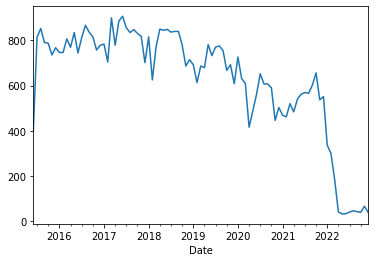

In [259]:
df_rox_monthly.INCIDENT_NUMBER.plot()

In [260]:
from statsmodels.tsa.stattools import adfuller

In [261]:
adfuller(df_rox_monthly.INCIDENT_NUMBER)

(-0.0980280882864161,
 0.9496345896789135,
 2,
 88,
 {'1%': -3.506944401824286,
  '5%': -2.894989819214876,
  '10%': -2.584614550619835},
 892.9995579157423)

In [262]:
df.SUBURB.unique()

array(['East Boston', nan, 'Dorchester', 'Roxbury', 'Mattapan',
       'Downtown Boston', 'Roslindale', 'Allston', 'South End',
       'South Boston', 'Hyde Park', 'Jamaica Plain', 'West End',
       'Mission Hill', 'Back Bay', 'Fenway-Kenmore', 'Beacon Hill',
       'Brighton', 'West Roxbury', 'Charlestown', 'North End',
       'Cambridgeport'], dtype=object)

In [263]:
df_mat = df[df.SUBURB == "Mattapan"]

In [264]:
df_mat

,INCIDENT_NUMBER,OFFENSE_CODE,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,LOCATION,LATITUDE,LONGITUDE,OFFENSE_DESCRIPTION,OFFENSE_CODE_GROUP,ADDRESS,ROAD,NEIGHBOURHOOD,SUBURB,CITY,COUNTY,Date
4946,I152066827,111,1,2015-08-12 22:18:00,2015,8,Wednesday,22,"(42.28079658, -71.09039724)",42.280797,-71.090397,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",HOMICIDE,"{'house_number': '29', 'road': 'Hosmer Street'...",Hosmer Street,NaN,Mattapan,Boston,Suffolk County,2015-08-12
4947,I172046900,111,1,2017-06-12 20:44:00,2017,6,Monday,20,"(42.28079658, -71.09039724)",42.280797,-71.090397,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",HOMICIDE,"{'house_number': '29', 'road': 'Hosmer Street'...",Hosmer Street,NaN,Mattapan,Boston,Suffolk County,2017-06-12
4948,I162067250,301,0,2016-08-19 18:07:00,2016,8,Friday,18,"(42.28079658, -71.09039724)",42.280797,-71.090397,ROBBERY - STREET,ROBBERY,"{'house_number': '29', 'road': 'Hosmer Street'...",Hosmer Street,NaN,Mattapan,Boston,Suffolk County,2016-08-19
4949,I162056541,301,0,2016-07-16 05:43:00,2016,7,Saturday,5,"(42.28079658, -71.09039724)",42.280797,-71.090397,ROBBERY - STREET,ROBBERY,"{'house_number': '29', 'road': 'Hosmer Street'...",Hosmer Street,NaN,Mattapan,Boston,Suffolk County,2016-07-16
4950,I162027840,301,0,2016-04-10 04:00:00,2016,4,Sunday,4,"(42.28079658, -71.09039724)",42.280797,-71.090397,ROBBERY - STREET,ROBBERY,"{'house_number': '29', 'road': 'Hosmer Street'...",Hosmer Street,NaN,Mattapan,Boston,Suffolk County,2016-04-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595467,212009800,3831,0,2021-02-14 11:39:00,2021,2,Sunday,11,"(42.27747566198516, -71.08264557490762)",42.277476,-71.082646,M/V - LEAVING SCENE - PROPERTY DAMAGE,MOTOR VEHICLE ACCIDENT RESPONSE,"{'house_number': '31', 'road': 'Glenhill Road'...",Glenhill Road,NaN,Mattapan,Boston,Suffolk County,2021-02-14
595503,202068645,3831,0,2020-09-19 14:46:00,2020,9,Saturday,14,"(42.273993979539, -71.0704610256506)",42.273994,-71.070461,M/V - LEAVING SCENE - PROPERTY DAMAGE,MOTOR VEHICLE ACCIDENT RESPONSE,"{'house_number': '1235', 'road': 'Morton Stree...",Morton Street,Lower Mills,Mattapan,Boston,Suffolk County,2020-09-19
595553,I182035343,3831,0,2018-05-09 23:30:00,2018,5,Wednesday,23,"(42.27044547, -71.10068751)",42.270445,-71.100688,M/V - LEAVING SCENE - PROPERTY DAMAGE,MOTOR VEHICLE ACCIDENT RESPONSE,"{'house_number': '747', 'road': 'Cummins Highw...",Cummins Highway,NaN,Mattapan,Boston,Suffolk County,2018-05-09
595567,212086661,3831,0,2021-11-27 00:00:00,2021,11,Saturday,0,"(42.27903515117108, -71.09871502631415)",42.279035,-71.098715,M/V - LEAVING SCENE - PROPERTY DAMAGE,MOTOR VEHICLE ACCIDENT RESPONSE,"{'house_number': '7', 'road': 'Alabama Street'...",Alabama Street,NaN,Mattapan,Boston,Suffolk County,2021-11-27


In [265]:
df_mat_monthly = df_mat.groupby(pd.Grouper(key = "Date", freq = "M")).count()

In [266]:
df_mat_monthly

,INCIDENT_NUMBER,OFFENSE_CODE,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,LOCATION,LATITUDE,LONGITUDE,OFFENSE_DESCRIPTION,OFFENSE_CODE_GROUP,ADDRESS,ROAD,NEIGHBOURHOOD,SUBURB,CITY,COUNTY
Date,,,,,,,,,,,,,,,,,,,
2015-06-30,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,47,247,247,247
2015-07-31,484,484,484,484,484,484,484,484,484,484,484,484,484,484,484,91,484,484,484
2015-08-31,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,91,470,470,470
2015-09-30,479,479,479,479,479,479,479,479,479,479,479,479,479,479,479,85,479,479,479
2015-10-31,440,440,440,440,440,440,440,440,440,440,440,440,440,440,440,87,440,440,440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,3,27,27,27
2022-09-30,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,1,26,26,26
2022-10-31,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,1,36,36,36


<AxesSubplot:xlabel='Date'>

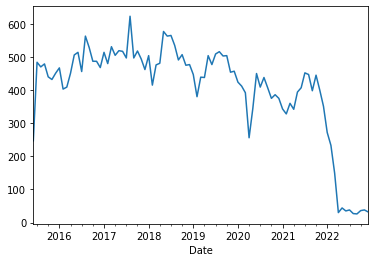

In [267]:
df_mat_monthly.INCIDENT_NUMBER.plot()

In [268]:
adfuller(df_mat_monthly.INCIDENT_NUMBER)

(1.7910839899702227,
 0.99833116867112,
 10,
 80,
 {'1%': -3.5148692050781247, '5%': -2.8984085156250003, '10%': -2.58643890625},
 822.7786487371386)

In [269]:
df_rox_monthly = df_rox_monthly.loc[:"2022-02-28"]
df_mat_monthly = df_mat_monthly.loc[:"2022-02-28"]

<AxesSubplot:xlabel='Date'>

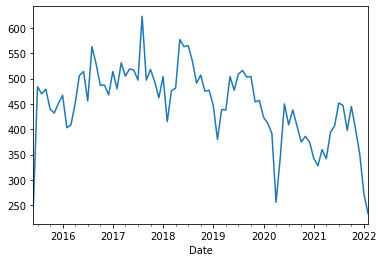

In [270]:
df_mat_monthly.INCIDENT_NUMBER.plot()

<AxesSubplot:xlabel='Date'>

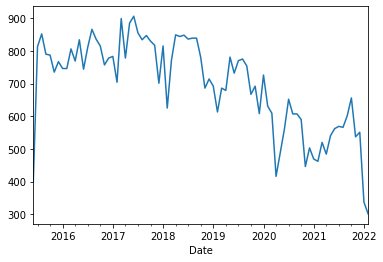

In [271]:
df_rox_monthly.INCIDENT_NUMBER.plot()

In [272]:
train = df_rox_monthly[:"2020-08-30"]
test = df_rox_monthly["2020-08-30":]

In [273]:
auto_arima(df_rox_monthly.INCIDENT_NUMBER, seasonal=True, m = 12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   81
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 12)   Log Likelihood                -462.654
Date:                             Sat, 23 Apr 2022   AIC                            933.308
Time:                                     13:34:54   BIC                            942.836
Sample:                                          0   HQIC                           937.128
                                              - 81                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3995      0.163      2.453      0.014       0.080       0.719
ma.L1         -0.8329      0.116     -7.187      0.000      -1.060      -0.606
ar.S.L12       0.4204      0.145      2.894      0.004       0.136       0.705
sigma2      5950.8655    916.257      6.495      0.000    4155.034    7746.697
===================================================================================
Ljung-Box (L1) (Q):                   0.82   Jarque-Bera (JB):                58.15
Prob(Q):                              0.36   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                             0.52
Prob(H) (two-sided):                  0.74   Kurtosis:                         7.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [274]:
model = SARIMAX(train.INCIDENT_NUMBER, order =(1, 1, 1), seasonal_order=(1, 0, [], 12)).fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.78984D+00    |proj g|=  9.46232D-02

At iterate    5    f=  5.72131D+00    |proj g|=  4.98790D-02

At iterate   10    f=  5.71768D+00    |proj g|=  9.27961D-03

At iterate   15    f=  5.70534D+00    |proj g|=  6.56421D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     22      1     0     0   6.218D-05   5.705D+00
  F =   5.7053269280454284     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


In [275]:
start = "2020-08-31"
end = "2022-02-28"

In [276]:
predictions = model.predict(start, end, typ = "levels").rename("Predictions")

/Users/nitheeshkoushik/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [277]:
test

,INCIDENT_NUMBER,OFFENSE_CODE,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,LOCATION,LATITUDE,LONGITUDE,OFFENSE_DESCRIPTION,OFFENSE_CODE_GROUP,ADDRESS,ROAD,NEIGHBOURHOOD,SUBURB,CITY,COUNTY
Date,,,,,,,,,,,,,,,,,,,
2020-08-31,607,607,607,607,607,607,607,607,607,607,607,607,607,607,607,424,607,607,607
2020-09-30,607,607,607,607,607,607,607,607,607,607,607,607,607,607,607,402,607,607,607
2020-10-31,590,590,590,590,590,590,590,590,590,590,590,590,590,590,590,394,590,590,590
2020-11-30,446,446,446,446,446,446,446,446,446,446,446,446,446,446,446,281,446,446,446
2020-12-31,503,503,503,503,503,503,503,503,503,503,503,503,503,503,503,307,503,503,503
2021-01-31,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,284,469,469,469
2021-02-28,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,291,462,462,462
2021-03-31,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,321,520,520,520
2021-04-30,484,484,484,484,484,484,484,484,484,484,484,484,484,484,484,288,484,484,484


In [278]:
predictions

2020-08-31    628.528527
2020-09-30    612.468613
2020-10-31    569.791859
2020-11-30    581.299484
2020-12-31    541.407223
2021-01-31    597.314068
2021-02-28    552.284481
2021-03-31    541.856556
2021-04-30    450.384290
2021-05-31    484.508505
2021-06-30    519.106714
2021-07-31    562.236003
2021-08-31    551.111738
2021-09-30    543.500169
2021-10-31    523.273596
2021-11-30    528.727615
2021-12-31    509.820747
2022-01-31    536.317699
2022-02-28    514.976005
Freq: M, Name: Predictions, dtype: float64

<AxesSubplot:xlabel='Date'>

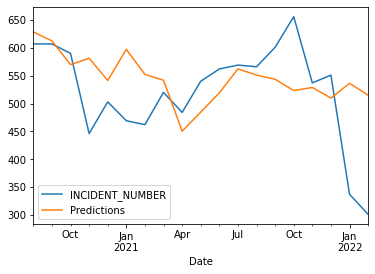

In [279]:
test.INCIDENT_NUMBER.plot(legend = True)
predictions.plot(legend = True)

In [280]:
rmse(predictions, test.INCIDENT_NUMBER)

91.85023559481373

In [281]:
mape(test.INCIDENT_NUMBER, predictions)

15.508902228060176

In [282]:
df_rox_monthly.INCIDENT_NUMBER.mean()

696.0246913580247

In [283]:
model = SARIMAX(df_rox_monthly.INCIDENT_NUMBER, order =(1, 1, 1), seasonal_order=(1, 0, [], 12)).fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.76925D+00    |proj g|=  4.96126D-02

At iterate    5    f=  5.73803D+00    |proj g|=  7.73385D-02

At iterate   10    f=  5.72095D+00    |proj g|=  2.86591D-03

At iterate   15    f=  5.71894D+00    |proj g|=  3.38408D-02

At iterate   20    f=  5.71180D+00    |proj g|=  1.76840D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     31      1     0     0   1.112D-06   5.712D+00
  F =   5.7117778436572193     

CONVERG

In [284]:
predictions = model.predict(len(df_rox_monthly), len(df_rox_monthly) + 11, typ = "levels").rename("Predictions")

<AxesSubplot:xlabel='Date'>

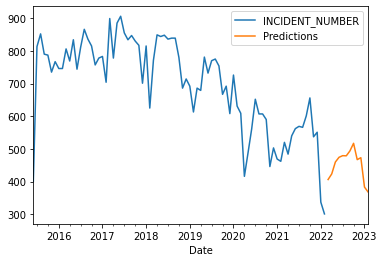

In [285]:
df_rox_monthly.INCIDENT_NUMBER.plot(legend = True)
predictions.plot(legend = True)

In [286]:
predictions

2022-03-31    406.235482
2022-04-30    423.399344
2022-05-31    459.847787
2022-06-30    474.252561
2022-07-31    479.255110
2022-08-31    478.816551
2022-09-30    493.860651
2022-10-31    517.116174
2022-11-30    467.136255
2022-12-31    473.043376
2023-01-31    383.077554
2023-02-28    367.945053
Freq: M, Name: Predictions, dtype: float64

In [287]:
df_monthly

,INCIDENT_NUMBER,OFFENSE_CODE,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,LOCATION,LATITUDE,LONGITUDE,OFFENSE_DESCRIPTION,OFFENSE_CODE_GROUP,ADDRESS,ROAD,NEIGHBOURHOOD,SUBURB,CITY,COUNTY
Date,,,,,,,,,,,,,,,,,,,
2015-06-30,4131,4131,4131,4131,4131,4131,4131,4131,4131,4131,4131,4131,4131,4131,4122,2637,3654,4131,4131
2015-07-31,8312,8312,8312,8312,8312,8312,8312,8312,8312,8312,8312,8312,8312,8312,8296,5232,7399,8310,8312
2015-08-31,8326,8326,8326,8326,8326,8326,8326,8326,8326,8326,8326,8326,8326,8326,8309,5203,7445,8323,8326
2015-09-30,8404,8404,8404,8404,8404,8404,8404,8404,8404,8404,8404,8404,8404,8404,8394,5300,7553,8402,8404
2015-10-31,8299,8299,8299,8299,8299,8299,8299,8299,8299,8299,8299,8299,8299,8299,8287,5247,7389,8298,8299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,6741,6741,6741,6741,6741,6741,6741,6741,6741,6741,6741,6741,6741,6741,6731,4245,6182,6739,6741
2021-11-30,5871,5871,5871,5871,5871,5871,5871,5871,5871,5871,5871,5871,5871,5871,5858,3718,5396,5869,5871
2021-12-31,5570,5570,5570,5570,5570,5570,5570,5570,5570,5570,5570,5570,5570,5570,5561,3550,5009,5567,5570


In [288]:
auto_arima(df_monthly.INCIDENT_NUMBER, start_p = 0, start_q = 0,
          max_p = 6, max_q = 6, seasonal = True, trace = True, m = 12).summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1267.618, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1280.583, Time=0.00 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1268.887, Time=0.11 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1274.519, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1278.593, Time=0.00 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1274.607, Time=0.05 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1269.809, Time=0.07 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=1269.618, Time=0.35 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=1269.618, Time=0.37 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=1272.081, Time=0.14 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=1268.845, Time=0.15 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=1271.596, Time=0.48 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1266.694, Time=0.16 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1273.960, Time=0.11 sec
 ARIMA(1,1,0)(2,0,1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   81
Model:             SARIMAX(1, 1, 0)x(1, 0, [1], 12)   Log Likelihood                -628.366
Date:                              Sat, 23 Apr 2022   AIC                           1264.732
Time:                                      13:35:02   BIC                           1274.260
Sample:                                           0   HQIC                          1268.552
                                               - 81                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2385      0.091      2.623      0.009       0.060       0.417
ar.S.L12       0.8898      0.109      8.148      0.000       0.676       1.104
ma.S.L12      -0.6204      0.203     -3.056      0.002      -1.018      -0.223
sigma2      3.744e+05    5.1e+04      7.341      0.000    2.74e+05    4.74e+05
===================================================================================
Ljung-Box (L1) (Q):                   3.92   Jarque-Bera (JB):               358.94
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):               0.34   Skew:                             1.75
Prob(H) (two-sided):                  0.01   Kurtosis:                        12.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [289]:
mape(test.INCIDENT_NUMBER, predictions)

nan

## ARIMA Models


In [290]:
auto_arima(df_monthly.INCIDENT_NUMBER, seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   81
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -633.443
Date:                Sat, 23 Apr 2022   AIC                           1272.886
Time:                        13:35:03   BIC                           1280.032
Sample:                             0   HQIC                          1275.751
                                 - 81                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2657      0.067      3.961      0.000       0.134       0.397
ma.L2          0.5084      0.116      4.368      0.000       0.280       0.736
sigma2      4.515e+05   5.13e+04      8.795      0.000    3.51e+05    5.52e+05
===================================================================================
Ljung-Box (L1) (Q):                   4.81   Jarque-Bera (JB):               161.56
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               0.47   Skew:                             1.52
Prob(H) (two-sided):                  0.05   Kurtosis:                         9.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [291]:
from statsmodels.tsa.statespace.tools import diff


In [292]:
df_monthly["Diff_1"] = diff(df_monthly.INCIDENT_NUMBER, k_diff = 1)

In [293]:
df_monthly.Diff_1

Date
2015-06-30       NaN
2015-07-31    4181.0
2015-08-31      14.0
2015-09-30      78.0
2015-10-31    -105.0
               ...  
2021-10-31     295.0
2021-11-30    -870.0
2021-12-31    -301.0
2022-01-31   -1453.0
2022-02-28    -634.0
Freq: M, Name: Diff_1, Length: 81, dtype: float64

In [294]:
adfuller(df_monthly.Diff_1.dropna())

(-4.047209712792277,
 0.001182513761668613,
 11,
 68,
 {'1%': -3.530398990560757,
  '5%': -2.9050874099328317,
  '10%': -2.5900010121107266},
 1011.3891594515771)

In [295]:
auto_arima(df_monthly.Diff_1.dropna(), seasonal = False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   80
Model:                        SARIMAX   Log Likelihood                -638.297
Date:                Sat, 23 Apr 2022   AIC                           1278.593
Time:                        13:35:03   BIC                           1280.975
Sample:                             0   HQIC                          1279.548
                                 - 80                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.986e+05   2.85e+04     17.489      0.000    4.43e+05    5.54e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               681.16
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.45   Skew:                             2.48
Prob(H) (two-sided):                  0.04   Kurtosis:                        16.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Date'>

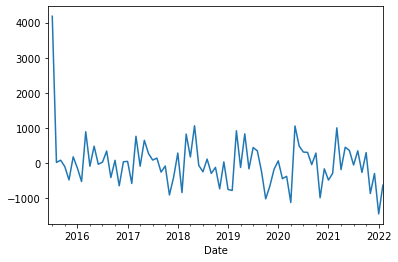

In [296]:
df_monthly.Diff_1.plot()

<AxesSubplot:xlabel='Date'>

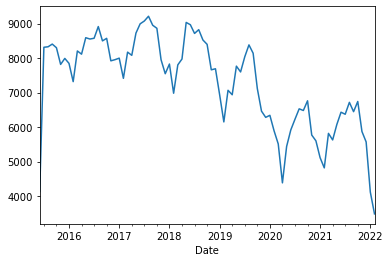

In [297]:
df_monthly.INCIDENT_NUMBER.plot()

In [298]:
adfuller(df_monthly.INCIDENT_NUMBER)

(0.6557304446261645,
 0.9889116965770363,
 12,
 68,
 {'1%': -3.530398990560757,
  '5%': -2.9050874099328317,
  '10%': -2.5900010121107266},
 1030.8337714454578)

In [299]:
auto_arima(df_monthly.INCIDENT_NUMBER, seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   81
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -633.443
Date:                Sat, 23 Apr 2022   AIC                           1272.886
Time:                        13:35:04   BIC                           1280.032
Sample:                             0   HQIC                          1275.751
                                 - 81                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2657      0.067      3.961      0.000       0.134       0.397
ma.L2          0.5084      0.116      4.368      0.000       0.280       0.736
sigma2      4.515e+05   5.13e+04      8.795      0.000    3.51e+05    5.52e+05
===================================================================================
Ljung-Box (L1) (Q):                   4.81   Jarque-Bera (JB):               161.56
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               0.47   Skew:                             1.52
Prob(H) (two-sided):                  0.05   Kurtosis:                         9.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

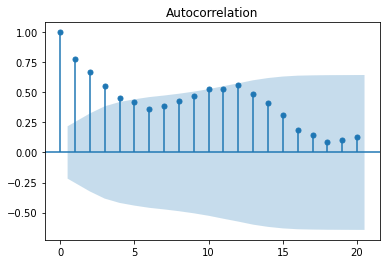

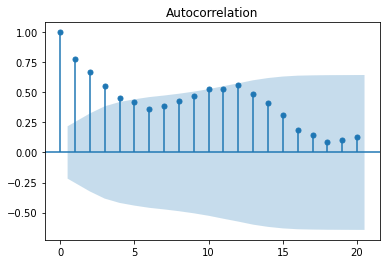

In [300]:
plot_acf(df_monthly.INCIDENT_NUMBER, lags = 20)

In [301]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

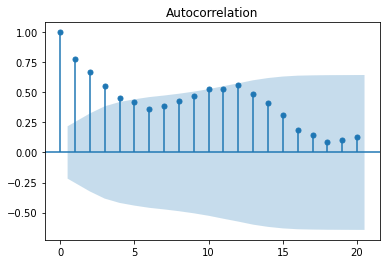

In [302]:
plot_acf(df_monthly.INCIDENT_NUMBER, lags = 20);

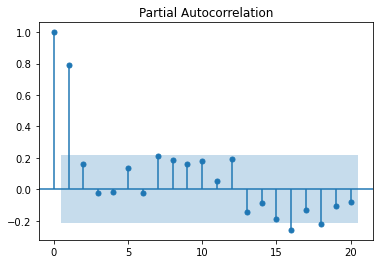

In [303]:
plot_pacf(df_monthly.INCIDENT_NUMBER, lags = 20);

In [312]:
train = df_monthly[:"2020-08-30"]
test = df_monthly["2020-08-30":]

In [315]:
sum(train.INCIDENT_NUMBER.isna())

0

In [305]:
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults

In [316]:
model = ARIMA(train.INCIDENT_NUMBER, order = (0, 1, 2)).fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.01090D+00    |proj g|=  3.51079D-02

At iterate    5    f=  8.00402D+00    |proj g|=  1.66978D-05

At iterate   10    f=  8.00402D+00    |proj g|=  4.02167D-04

At iterate   15    f=  8.00390D+00    |proj g|=  1.64437D-03

At iterate   20    f=  8.00388D+00    |proj g|=  7.28306D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     29      1     0     0   0.000D+00   8.004D+00
  F =   8.0038767187120250     

CONVERG

/Users/nitheeshkoushik/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
 This problem is unconstrained.


In [317]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:      D.INCIDENT_NUMBER   No. Observations:                   61
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -488.236
Method:                       css-mle   S.D. of innovations            722.673
Date:                Sat, 23 Apr 2022   AIC                            984.473
Time:                        13:37:49   BIC                            992.916
Sample:                    07-31-2015   HQIC                           987.782
                         - 07-31-2020                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      63.8853    131.299      0.487      0.627    -193.456     321.227
ma.L1.D.INCIDENT_NUMBER     0.0745      0.219      0.340      0.734      -0.355       0.504
ma.L2.D.INCIDENT_NUMBER     0.3353      0.217      1.546      0.122      -0.090       0.760
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -0.1111           -1.7234j            1.7270           -0.2603
MA.2           -0.1111           +1.7234j            1.7270            0.2603
-----------------------------------------------------------------------------
"""

In [321]:
ARIMA_Predictions = model.predict(start = start, end = end, typ = "levels").rename("ARIMA Predictions")

/Users/nitheeshkoushik/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


<AxesSubplot:xlabel='Date'>

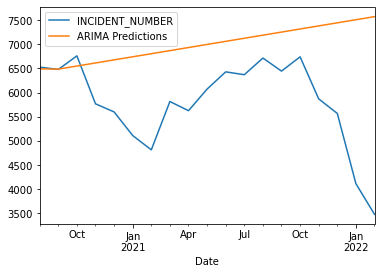

In [322]:
test.INCIDENT_NUMBER.plot(legend = True)
ARIMA_Predictions.plot(legend = True)

In [324]:
mape(test.INCIDENT_NUMBER,ARIMA_Predictions)

25.065226348620655